In [96]:
import pandas as pd
import numpy as np

In [97]:
df = pd.read_csv('./dataset/spam.csv', encoding='latin-1')

In [98]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [99]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2950,ham,Hey now am free you can call me.,NaN,NaN,NaN
4496,ham,Ok,NaN,NaN,NaN
638,ham,"What will we do in the shower, baby?",NaN,NaN,NaN
5287,ham,Hey ! Don't forget ... You are MINE ... For ME...,NaN,NaN,NaN
448,ham,LOL ... Have you made plans for new years?,NaN,NaN,NaN


### 1. Data cleaning

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [101]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [102]:
df.rename(columns={'v1':'label','v2':'text'},inplace=True)

In [103]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['label'] = labelencoder.fit_transform(df['label'])

In [104]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [105]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [106]:
df.duplicated().sum()

np.int64(403)

In [107]:
df = df.drop_duplicates(keep='first')

In [108]:
df.shape

(5169, 2)

### 2. EDA

In [109]:
df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [110]:
df['label'].value_counts()

label
0    4516
1     653
Name: count, dtype: int64

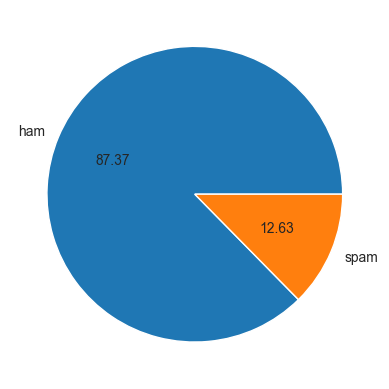

In [111]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct='%.2f')
plt.show()

In [112]:
import nltk
print(nltk.__version__)
# nltk.download('punkt')
# nltk.download('punkt_tab')

3.9.1


In [113]:
# No. of characters in each message
df['num_chars'] = df['text'].apply(len)

In [114]:
# No. of words in each message
df['num_words'] = df['text'].astype(str).apply(lambda x: len(nltk.word_tokenize(x)))

In [115]:
# No. of sentences in each message
df['num_sent'] = df['text'].astype(str).apply(lambda x: len(nltk.sent_tokenize(x)))

In [116]:
df.head()

,label,text,num_chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [117]:
(df[['num_chars', 'num_words', 'num_sent']].describe())

,num_chars,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [118]:
# Ham
df[df['label']==0][['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [119]:
# Spam
df[df['label']==1][['num_chars','num_words','num_sent']].describe()

,num_chars,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


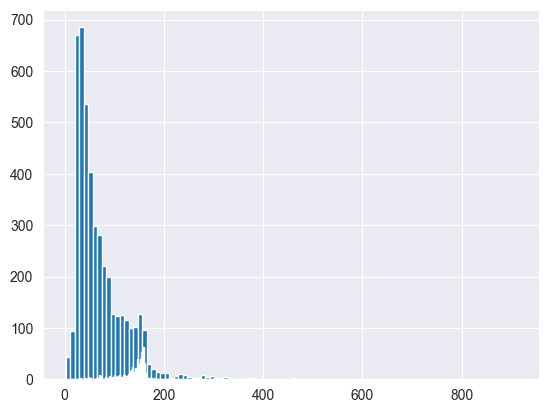

In [120]:
plt.hist(df[df['label']== 0]['num_chars'], bins=100)
plt.hist(df[df['label']== 1]['num_chars'], bins=100)
plt.show()

<Axes: xlabel='num_chars', ylabel='Count'>

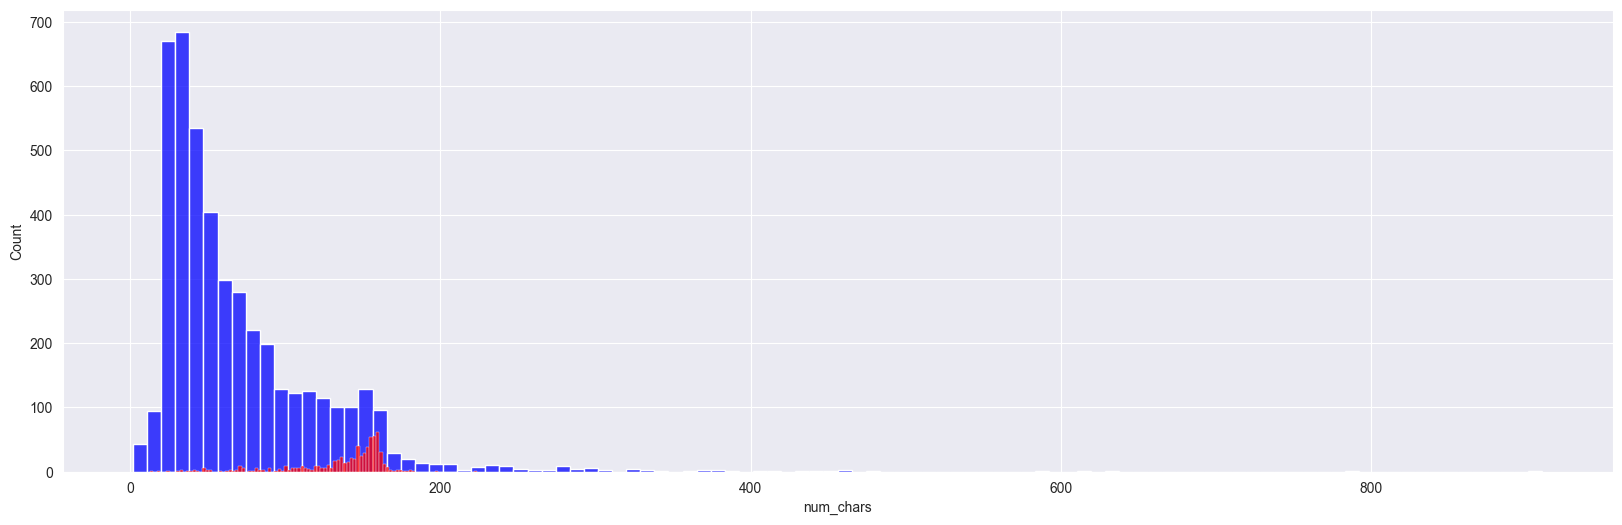

In [121]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.histplot(df[df['label']== 0]['num_chars'], bins=100,color='blue')
sns.histplot(df[df['label']== 1]['num_chars'], bins=100,color='red')

<Axes: xlabel='num_words', ylabel='Count'>

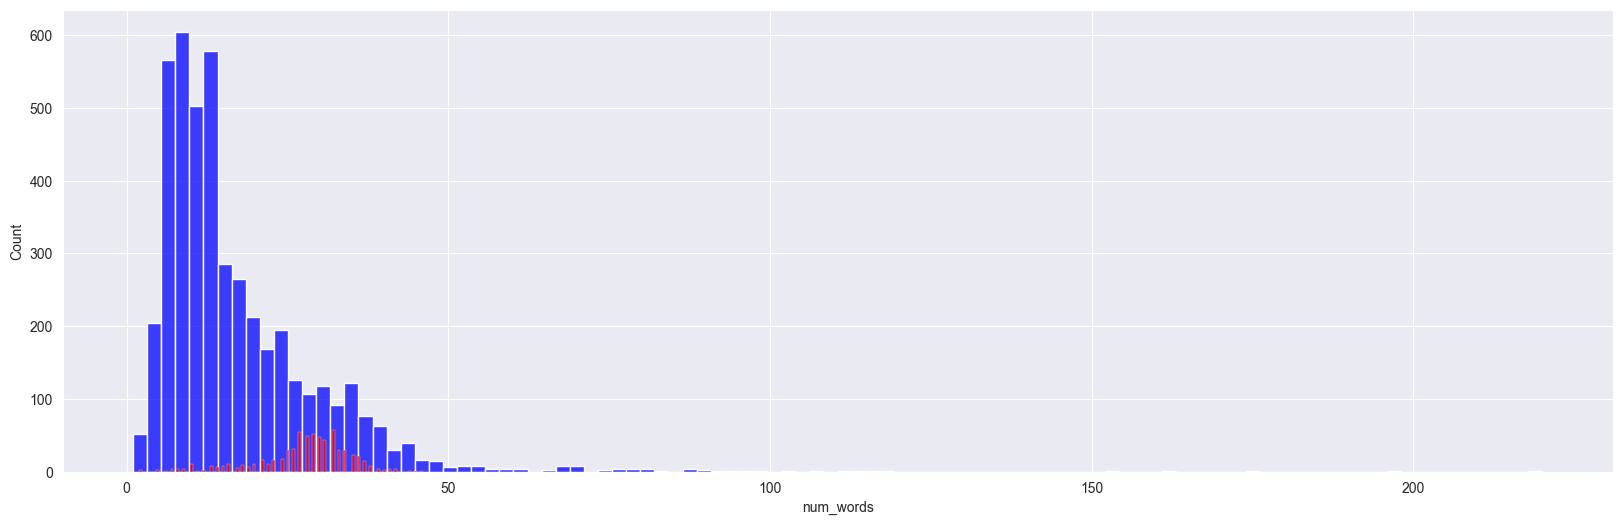

In [122]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.histplot(df[df['label']== 0]['num_words'], bins=100,color='blue')
sns.histplot(df[df['label']== 1]['num_words'], bins=100,color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

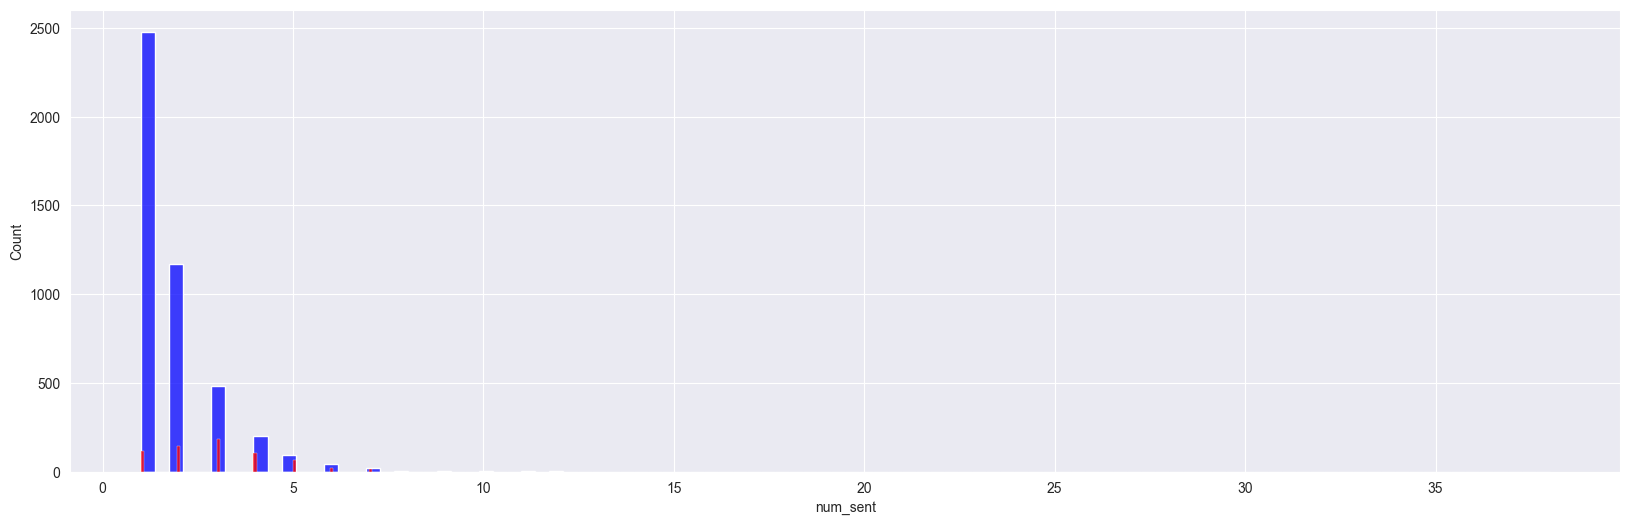

In [123]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.histplot(df[df['label']== 0]['num_sent'], bins=100,color='blue')
sns.histplot(df[df['label']== 1]['num_sent'], bins=100,color='red')

<Figure size 5000x5000 with 0 Axes>

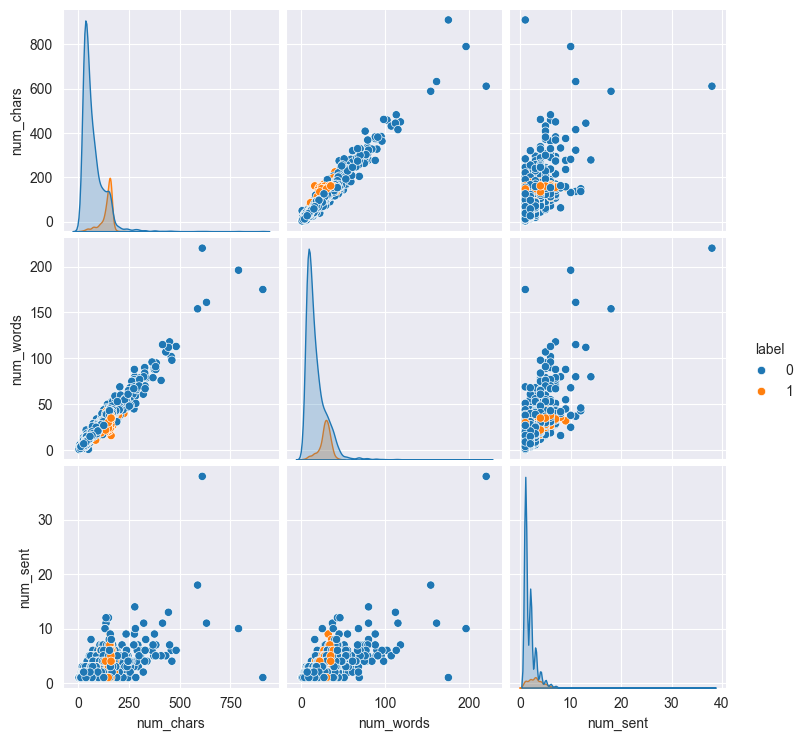

In [124]:
plt.figure(figsize=(50,50))
sns.pairplot(df,hue='label')
plt.show()

In [125]:
df

,label,text,num_chars,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


<Axes: >

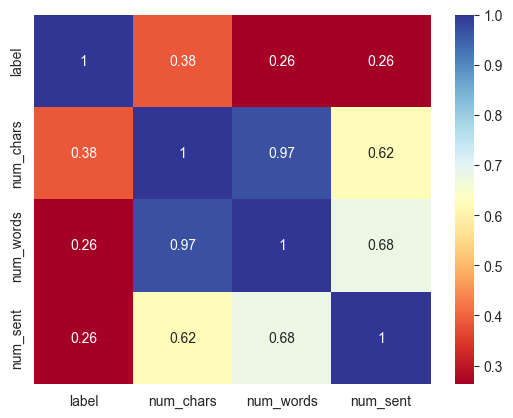

In [126]:
sns.heatmap(df.iloc[:][['label','num_chars','num_words','num_sent']].corr(),annot=True,cmap='RdYlBu')
# Since label is more dependent on number of words, we take num_words

## 3. Data Preprocessing
*   Lower case
*   Tokenization
*   Removing special characters
*   Removing stop word and punctuation
*   Stemming


In [127]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [128]:
# import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [129]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [130]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [131]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [132]:
df['transformed_text'] = df['text'].apply(transform_text)

In [133]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

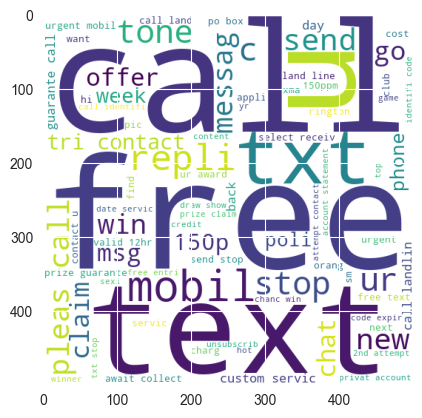

In [134]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)

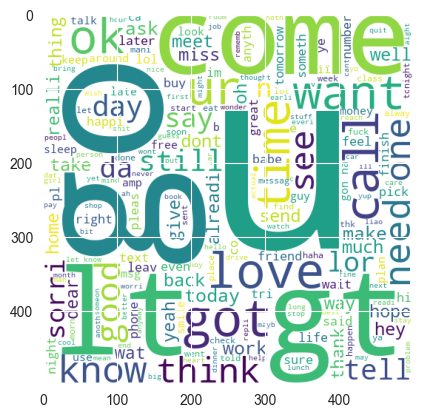

In [135]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [136]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [137]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [138]:
(len(spam_corpus),len(ham_corpus))

(9939, 35404)

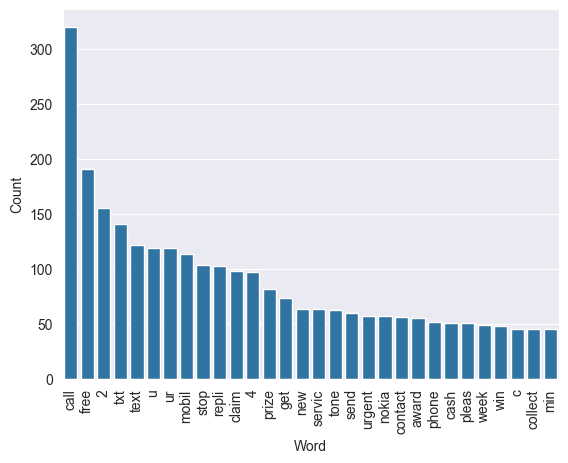

In [139]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create DataFrame from Counter
word_counts = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Count'])

# Create the bar plot with named parameters
sns.barplot(x='Word', y='Count', data=word_counts)

# Rotate x-axis labels for better readability
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building


### Text Vectorization Methods:
1. CountVectorizer
2. TfidfVectorizer


In [140]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [141]:
from sklearn.model_selection import train_test_split

X = df['transformed_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train).toarray()
X_test_cv = cv.transform(X_test).toarray()


In [142]:
# TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

In [143]:
X_train_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [144]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [145]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [146]:
gnb.fit(X_train_cv, y_train)
y_pred_gnb = gnb.predict(X_test_cv)
print(accuracy_score(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))

0.8684719535783365
0.5185185185185185
[[772 117]
 [ 19 126]]


In [147]:
gnb.fit(X_train_tfidf, y_train)
y_pred_gnb = gnb.predict(X_test_cv)
print(accuracy_score(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))

0.8704061895551257
0.5228215767634855
[[774 115]
 [ 19 126]]


In [148]:
mnb.fit(X_train_cv, y_train)
y_pred_mnb = mnb.predict(X_test_cv)
print(accuracy_score(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))

0.9796905222437138
0.9492753623188406
[[882   7]
 [ 14 131]]


In [149]:
mnb.fit(X_train_tfidf, y_train)
y_pred_mnb = mnb.predict(X_test_cv)
print(accuracy_score(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))

0.97678916827853
0.984
[[887   2]
 [ 22 123]]


In [150]:
bnb.fit(X_train_cv,y_train)
y_pred_bnb = bnb.predict(X_test_cv)
print(accuracy_score(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))

0.965183752417795
0.9823008849557522
[[887   2]
 [ 34 111]]


In [151]:
bnb.fit(X_train_tfidf,y_train)
y_pred_bnb = bnb.predict(X_test_cv)
print(accuracy_score(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))

0.965183752417795
0.9823008849557522
[[887   2]
 [ 34 111]]


In [152]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [153]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [154]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [155]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy, precision

In [156]:
train_classifier(svc,X_train_cv,y_train,X_test_cv,y_test)

(0.9323017408123792, 0.7737226277372263)

In [157]:
X_train=X_train_tfidf
X_test=X_test_tfidf

In [158]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy: ",current_accuracy)
    print("Precision: ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy:  0.9777562862669246
Precision:  0.9420289855072463
For  KN
Accuracy:  0.8994197292069632
Precision:  1.0
For  NB
Accuracy:  0.9622823984526112
Precision:  0.9907407407407407
For  DT
Accuracy:  0.925531914893617
Precision:  0.7931034482758621
For  LR
Accuracy:  0.9497098646034816
Precision:  0.8661417322834646
For  RF
Accuracy:  0.9729206963249516
Precision:  0.9915966386554622
For  AdaBoost
Accuracy:  0.9148936170212766
Precision:  0.8202247191011236
For  BgC
Accuracy:  0.9574468085106383
Precision:  0.8854961832061069
For  ETC
Accuracy:  0.9738878143133463
Precision:  0.9758064516129032
For  GBDT
Accuracy:  0.9487427466150871
Precision:  0.9509803921568627
For  xgb
Accuracy:  0.9632495164410058
Precision:  0.9421487603305785


In [159]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [160]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.899420,1.000000
5,RF,0.972921,0.991597
2,NB,0.962282,0.990741
8,ETC,0.973888,0.975806
9,GBDT,0.948743,0.950980
10,xgb,0.963250,0.942149
0,SVC,0.977756,0.942029
7,BgC,0.957447,0.885496
4,LR,0.949710,0.866142
6,AdaBoost,0.914894,0.820225


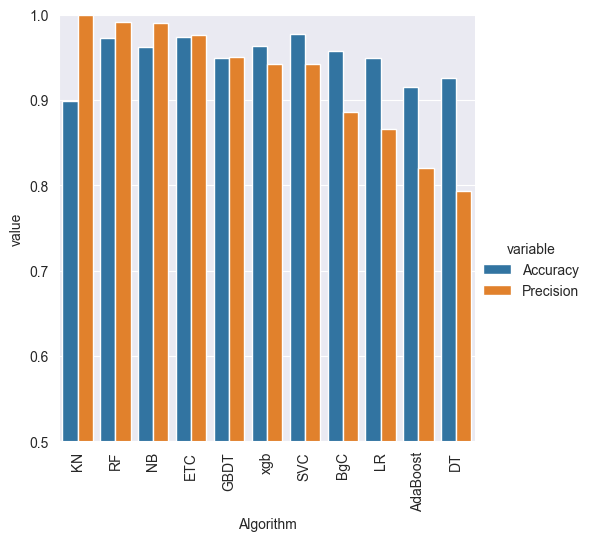

In [161]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()


In [162]:
import pickle
pickle.dump(mnb, open('model.pkl', 'wb'))
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))